<a href="https://colab.research.google.com/github/IndraLukasTjahaja/Digital_Credit_Risk/blob/main/Lampiran_1_Fraud_Scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lampiran 1 - Fraud Scoring

In [2]:
# L1.1 Impor data di Python

# library panda untuk menggunakan data frame
import pandas as pd

# Impor data dari excel xls ke Python
# Pembaca dapat langsung menunjuk kepada file excel yang terletak di website pendamping buku ini
# atau mengunduh terlebih dahulu dan menunjuk ke file excel di lokasi hard drive
# contoh: df = pd.read_excel('C:\User\pembaca\downloads\Credit_Scoring_Dataset.xlsx')

df = pd.read_excel('https://github.com/IndraLukasTjahaja/Digital_Credit_Risk/raw/main/Fraud_Scoring_Dataset.xlsx')

In [3]:
# L1.2 Struktur data

# Melihat sample dari dataset
df.head(10) # Menampilkan 10 baris teratas dari dataframe df

,ID,Fraud,API_Fraud_Vendor_D,API_Fraud_Vendor_C,Application_Duration,Device_Type,Device_Apps_Installed,Device_Active_Since,Mobile_Provider,Mobile_Number_Active_Since,Email_Domain_Type,GPS_di_rumah_kantor
0,DEF0001,0,102,384,4.10-20 menit,Android,6,2_1_ke_3_tahun,Telco_A,1_Kurang_1_bulan,Public_Domain: Common,1
1,DEF0002,0,84,172,3.5-10 menit,IOS,9,3_Lebih_3_tahun,Telco_A,1_Kurang_1_bulan,Public_Domain: Common,1
2,DEF0003,0,286,194,5.20 menit lebih,Android,36,3_Lebih_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,1
3,DEF0004,0,36,318,3.5-10 menit,Android,14,3_Lebih_3_tahun,Telco_E,4_2_ke_5_tahun,Professional_Domain,1
4,DEF0005,0,162,126,2.3-5 menit,Android,10,3_Lebih_3_tahun,Telco_D,1_Kurang_1_bulan,Public_Domain: Common,1
5,DEF0006,0,198,400,2.3-5 menit,Android,5,3_Lebih_3_tahun,Telco_A,2_Kurang_1_tahun,Public_Domain: Common,1
6,DEF0007,0,111,344,4.10-20 menit,Android,37,3_Lebih_3_tahun,Telco_C,5_Lebih_5_tahun,Public_Domain: Common,0
7,DEF0008,0,36,372,4.10-20 menit,Android,35,3_Lebih_3_tahun,Telco_E,5_Lebih_5_tahun,Public_Domain: Common,1
8,DEF0009,0,15,470,2.3-5 menit,IOS,17,2_1_ke_3_tahun,Telco_A,3_1_ke_2_tahun,Public_Domain: Common,1
9,DEF0010,0,85,570,4.10-20 menit,Android,17,2_1_ke_3_tahun,Telco_C,4_2_ke_5_tahun,Public_Domain: Common,0


In [4]:
# Melihat penjelasan singkat dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          1000 non-null   object
 1   Fraud                       1000 non-null   int64 
 2   API_Fraud_Vendor_D          1000 non-null   int64 
 3   API_Fraud_Vendor_C          1000 non-null   int64 
 4   Application_Duration        1000 non-null   object
 5   Device_Type                 1000 non-null   object
 6   Device_Apps_Installed       1000 non-null   int64 
 7   Device_Active_Since         1000 non-null   object
 8   Mobile_Provider             1000 non-null   object
 9   Mobile_Number_Active_Since  1000 non-null   object
 10  Email_Domain_Type           1000 non-null   object
 11  GPS_di_rumah_kantor         1000 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 93.9+ KB


In [6]:
# L1.3 Tipe data

# Merubah tipe data menjadi tipe karakter kategori
df['ID'] = df.ID.astype('category')
df['Device_Type'] = df.Device_Type.astype('category')
df['Application_Duration'] = df.Application_Duration.astype('category')
df['Device_Active_Since'] = df.Device_Active_Since.astype('category')
df['Mobile_Provider'] = df.Mobile_Provider.astype('category')
df['Mobile_Number_Active_Since'] = df.Mobile_Number_Active_Since.astype('category')
df['Email_Domain_Type'] = df.Email_Domain_Type.astype('category')
df['GPS_di_rumah_kantor'] = df.GPS_di_rumah_kantor.astype('category')

# Merubah tipe data menjadi tipe karakter int64
# Gunakan integer untuk angka bulat
df['API_Fraud_Vendor_D'] = df.API_Fraud_Vendor_D.astype('int64')
df['API_Fraud_Vendor_C'] = df.API_Fraud_Vendor_C.astype('int64')
df['GPS_di_rumah_kantor'] = df.GPS_di_rumah_kantor.astype('int64')
df['Device_Apps_Installed'] = df.Device_Apps_Installed.astype('int64')
df['Fraud'] = df.Fraud.astype('int64')

In [25]:
df_model = df[['Fraud','Device_Type','Application_Duration','Device_Active_Since','Mobile_Provider'
                  ]]
# df_model = df[['Fraud','Device_Type','Application_Duration','Device_Active_Since'
                 # ,'Mobile_Provider','Mobile_Number_Active_Since','Email_Domain_Type','GPS_di_rumah_kantor'
                 # ,'API_Fraud_Vendor_D','API_Fraud_Vendor_C','GPS_di_rumah_kantor','Device_Apps_Installed'
                 # ]]

In [26]:
# Membagi dataset menjadi development(train) dan test

y = df_model.loc[:,'Fraud']
X = df_model.loc[:,df_model.columns != 'Fraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Dalam bentuk dataframe lengkap
df_train = pd.concat([X_train, y_train], axis = 1)
df_test = pd.concat([X_test, y_test], axis = 1)

# Menghapus indeks dari data yang telah dibuang
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [10]:
# install scorecardpy
!pip install -q scorecardpy
#!pip install git+git://github.com/shichenxie/scorecardpy.git

     |████████████████████████████████| 55 kB 2.0 MB/s 


In [17]:
df_train.info()
df_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Device_Type  700 non-null    category
 1   Fraud        700 non-null    int64   
dtypes: category(1), int64(1)
memory usage: 6.4 KB


,Device_Type,Fraud
0,IOS,1
1,Android,0
2,Android,0
3,Android,0
4,Android,0
5,Android,0
6,Android,0
7,Android,0
8,Android,0
9,Android,0


[INFO] creating woe binning ...


{'Application_Duration': <Figure size 432x288 with 2 Axes>,
 'Device_Active_Since': <Figure size 432x288 with 2 Axes>,
 'Device_Type': <Figure size 432x288 with 2 Axes>,
 'Mobile_Provider': <Figure size 432x288 with 2 Axes>}

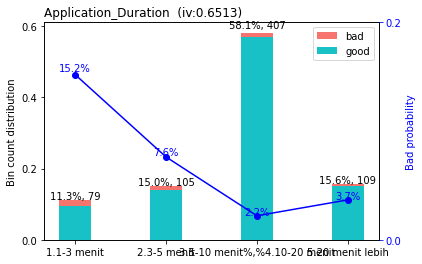

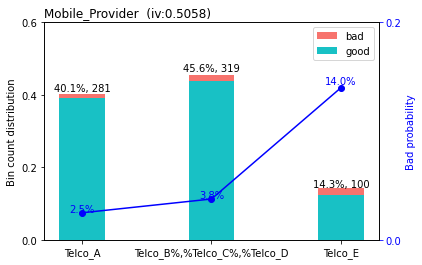

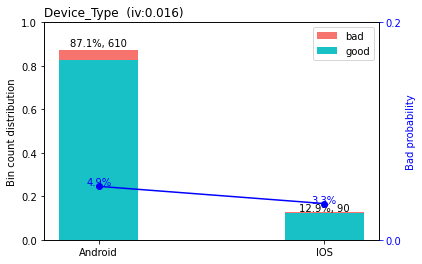

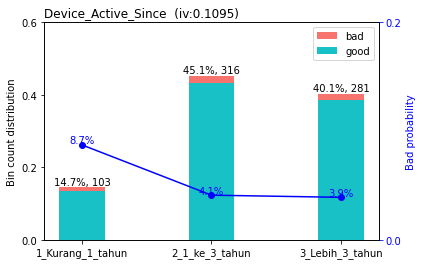

In [27]:
# Credit Scoring using logistic regression with library scorecardpy
import scorecardpy as scpy

# Melakukan WOE binning
bins = scpy.woebin(df_train, y = 'Fraud')

scpy.woebin_plot(bins)